In [587]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing  import StandardScaler

In [588]:
##load dataframe

df = pd.read_csv('/Users/joaosantos/Desktop/ai/alzheimers_predico/alzheimers_prediction_dataset.csv')

In [589]:
## rows and columns
df.shape

(74283, 25)

In [590]:
## describe numerical columns
df.describe()

,Age,Education Level,BMI,Cognitive Test Score
count,74283.000000,74283.000000,74283.000000,74283.000000
mean,71.964703,9.487514,26.780639,64.654241
std,12.980748,5.757020,4.764679,20.153247
min,50.000000,0.000000,18.500000,30.000000
25%,61.000000,4.000000,22.700000,47.000000
50%,72.000000,9.000000,26.800000,65.000000
75%,83.000000,14.000000,30.900000,82.000000
max,94.000000,19.000000,35.000000,99.000000


In [591]:
## describe categorical columns
df.describe(include=['object', 'category', 'bool'])

,Country,Gender,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Depression Level,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
count,74283,74283,74283,74283,74283,74283,74283,74283,74283,74283,...,74283,74283,74283,74283,74283,74283,74283,74283,74283,74283
unique,20,2,3,3,3,2,2,2,2,3,...,3,3,3,3,2,3,3,3,2,2
top,Brazil,Female,High,Current,Never,No,No,Normal,No,Medium,...,Average,High,Unemployed,Single,No,Medium,Low,Medium,Rural,No
freq,3839,37249,24853,24915,24865,59527,52134,51973,52004,24843,...,24917,24906,24801,25169,59561,24859,24873,24886,37203,43570


In [592]:
##first 5 rows
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [593]:
##check for data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [594]:
from sklearn.model_selection import train_test_split


##divide dataset into train, validation and holdout 
# First split: Separate holdout (unseen) data
train_val_data, holdout_data = train_test_split(
    df, 
    test_size=0.3,  # 30% for completely unseen data
    random_state=42
)

# Second split: Create train and validation sets from remaining data
train_data, val_data = train_test_split(
    train_val_data,
    test_size=0.2,  # 20% of 70% ≈ 14% of total
    random_state=42
)

# Final split proportions will be approximately:
# - Training: 56% of data    (~41,600 rows)
# - Validation: 14% of data  (~10,400 rows)
# - Holdout: 30% of data    (~22,285 rows)

print(f"Training set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Holdout set size: {len(holdout_data)}")

Training set size: 41598
Validation set size: 10400
Holdout set size: 22285


In [595]:
train_data

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
46974,India,68,Female,15,20.9,High,Never,Regularly,No,Yes,...,Unhealthy,Medium,Retired,Widowed,No,Low,High,High,Urban,No
18168,Saudi Arabia,66,Female,4,24.9,Medium,Former,Never,No,No,...,Average,Low,Employed,Single,No,Low,Medium,Low,Urban,No
21950,Australia,58,Female,2,26.3,High,Current,Regularly,No,No,...,Unhealthy,High,Employed,Widowed,No,Medium,Low,Low,Urban,No
10462,South Africa,81,Female,12,30.5,High,Never,Never,Yes,No,...,Average,Low,Employed,Married,No,Low,High,High,Urban,Yes
69308,Japan,81,Female,8,23.5,Medium,Current,Occasionally,Yes,No,...,Average,Medium,Retired,Widowed,No,Low,High,Low,Urban,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58855,USA,80,Female,19,32.5,High,Never,Regularly,No,Yes,...,Unhealthy,Medium,Retired,Married,No,Medium,Medium,Medium,Rural,No
31113,Japan,54,Male,9,19.7,Medium,Former,Never,No,Yes,...,Unhealthy,High,Employed,Widowed,Yes,High,Low,High,Urban,No
41809,South Africa,62,Female,10,31.9,High,Never,Regularly,No,Yes,...,Average,Low,Employed,Married,Yes,Medium,High,Low,Urban,No
6275,Canada,58,Male,7,21.1,Medium,Former,Occasionally,No,No,...,Unhealthy,Low,Employed,Married,Yes,Medium,High,High,Rural,Yes


In [596]:
##unique values for categorical columns
train_data.select_dtypes(include=['number', 'object', 'category']).nunique()

Country                                  20
Age                                      45
Gender                                    2
Education Level                          20
BMI                                     166
Physical Activity Level                   3
Smoking Status                            3
Alcohol Consumption                       3
Diabetes                                  2
Hypertension                              2
Cholesterol Level                         2
Family History of Alzheimer’s             2
Cognitive Test Score                     70
Depression Level                          3
Sleep Quality                             3
Dietary Habits                            3
Air Pollution Exposure                    3
Employment Status                         3
Marital Status                            3
Genetic Risk Factor (APOE-ε4 allele)      2
Social Engagement Level                   3
Income Level                              3
Stress Levels                   


Alzheimer's Rate by Education Level:
Alzheimer’s Diagnosis         No        Yes
Education Level                            
0                      58.527132  41.472868
1                      58.785047  41.214953
2                      58.627356  41.372644
3                      59.625540  40.374460
4                      60.518868  39.481132
5                      57.487685  42.512315
6                      57.607160  42.392840
7                      57.611798  42.388202
8                      60.374640  39.625360
9                      59.408341  40.591659
10                     57.528958  42.471042
11                     56.987654  43.012346
12                     58.568647  41.431353
13                     60.521141  39.478859
14                     58.049463  41.950537
15                     58.388004  41.611996
16                     59.800190  40.199810
17                     58.345358  41.654642
18                     58.214110  41.785890
19                     58.938139  41.0

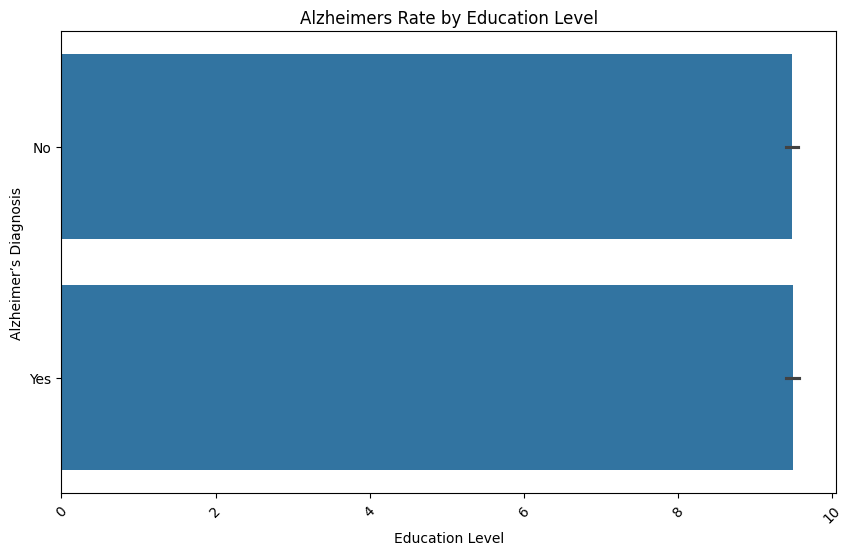

In [597]:
##Should I drop Country and Education Level??

# For Education Level
print("\nAlzheimer's Rate by Education Level:")
print(pd.crosstab(train_data['Education Level'], 
                  train_data['Alzheimer’s Diagnosis'], 
                  normalize='index') * 100)

# For Country
print("\nAlzheimer's Rate by Country:")
print(pd.crosstab(train_data['Country'], 
                  train_data['Alzheimer’s Diagnosis'], 
                  normalize='index') * 100)

# Optional: Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=train_data, 
            x='Education Level', 
            y='Alzheimer’s Diagnosis')
plt.xticks(rotation=45)
plt.title('Alzheimers Rate by Education Level')
plt.show()

In [598]:
##drop country and education level
def drop_country_education(data):
    return data.drop(columns=['Country', 'Education Level'])

train_data = drop_country_education(train_data)
val_data = drop_country_education(val_data)
holdout_data = drop_country_education(holdout_data)

In [599]:
## Convert categorical columns with 3 labels to binary
categorical_columns = [
    'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
    'Depression Level', 'Sleep Quality', 'Dietary Habits',
    'Air Pollution Exposure', 'Employment Status', 'Marital Status',
    'Social Engagement Level', 'Income Level', 'Stress Levels'
]

# Define the binary columns
binary_cols = [
    "Diabetes", "Hypertension", "Family History of Alzheimer’s",
    "Genetic Risk Factor (APOE-ε4 allele)", "Alzheimer’s Diagnosis"
    ]

In [600]:
# Print unique values and their counts for categorical columns
for col in categorical_columns:
    print(f"\n{col}:")
    print(train_data[col].astype(str).value_counts())
    print("-" * 50)


Physical Activity Level:
Physical Activity Level
Low       13892
High      13876
Medium    13830
Name: count, dtype: int64
--------------------------------------------------

Smoking Status:
Smoking Status
Current    13949
Never      13835
Former     13814
Name: count, dtype: int64
--------------------------------------------------

Alcohol Consumption:
Alcohol Consumption
Never           13971
Occasionally    13858
Regularly       13769
Name: count, dtype: int64
--------------------------------------------------

Depression Level:
Depression Level
Low       13934
Medium    13842
High      13822
Name: count, dtype: int64
--------------------------------------------------

Sleep Quality:
Sleep Quality
Good       13977
Average    13819
Poor       13802
Name: count, dtype: int64
--------------------------------------------------

Dietary Habits:
Dietary Habits
Average      13976
Healthy      13823
Unhealthy    13799
Name: count, dtype: int64
----------------------------------------------

In [601]:
for col in binary_cols:
    print(f"\n{col}:")
    print(train_data[col].astype(str).value_counts())
    print("-" * 50)



Diabetes:
Diabetes
No     33426
Yes     8172
Name: count, dtype: int64
--------------------------------------------------

Hypertension:
Hypertension
No     29106
Yes    12492
Name: count, dtype: int64
--------------------------------------------------

Family History of Alzheimer’s:
Family History of Alzheimer’s
No     29157
Yes    12441
Name: count, dtype: int64
--------------------------------------------------

Genetic Risk Factor (APOE-ε4 allele):
Genetic Risk Factor (APOE-ε4 allele)
No     33397
Yes     8201
Name: count, dtype: int64
--------------------------------------------------

Alzheimer’s Diagnosis:
Alzheimer’s Diagnosis
No     24417
Yes    17181
Name: count, dtype: int64
--------------------------------------------------


In [602]:
def convert_binary_columns(data):
    for col in binary_cols:
        data[col] = data[col].map({'No': 0, 'Yes': 1})
    return data 
train_data = convert_binary_columns(train_data)
val_data = convert_binary_columns(val_data)
holdout_data = convert_binary_columns(holdout_data)


In [603]:
train_data

,Age,Gender,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
46974,68,Female,20.9,High,Never,Regularly,0,1,High,0,...,Unhealthy,Medium,Retired,Widowed,0,Low,High,High,Urban,0
18168,66,Female,24.9,Medium,Former,Never,0,0,Normal,1,...,Average,Low,Employed,Single,0,Low,Medium,Low,Urban,0
21950,58,Female,26.3,High,Current,Regularly,0,0,Normal,1,...,Unhealthy,High,Employed,Widowed,0,Medium,Low,Low,Urban,0
10462,81,Female,30.5,High,Never,Never,1,0,High,1,...,Average,Low,Employed,Married,0,Low,High,High,Urban,1
69308,81,Female,23.5,Medium,Current,Occasionally,1,0,Normal,0,...,Average,Medium,Retired,Widowed,0,Low,High,Low,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58855,80,Female,32.5,High,Never,Regularly,0,1,Normal,1,...,Unhealthy,Medium,Retired,Married,0,Medium,Medium,Medium,Rural,0
31113,54,Male,19.7,Medium,Former,Never,0,1,Normal,0,...,Unhealthy,High,Employed,Widowed,1,High,Low,High,Urban,0
41809,62,Female,31.9,High,Never,Regularly,0,1,High,1,...,Average,Low,Employed,Married,1,Medium,High,Low,Urban,0
6275,58,Male,21.1,Medium,Former,Occasionally,0,0,High,0,...,Unhealthy,Low,Employed,Married,1,Medium,High,High,Rural,1


In [604]:
def convert_categorical_columns(data):
    for col in categorical_columns:
        dummy_cols = pd.get_dummies(data[col], prefix=col, drop_first=False)
        data = pd.concat([data, dummy_cols], axis=1)
        data = data.drop(columns=[col])
    return data
train_data = convert_categorical_columns(train_data)
val_data = convert_categorical_columns(val_data)
holdout_data = convert_categorical_columns(holdout_data)
train_data


,Age,Gender,BMI,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Cognitive Test Score,Genetic Risk Factor (APOE-ε4 allele),Urban vs Rural Living,...,Marital Status_Widowed,Social Engagement Level_High,Social Engagement Level_Low,Social Engagement Level_Medium,Income Level_High,Income Level_Low,Income Level_Medium,Stress Levels_High,Stress Levels_Low,Stress Levels_Medium
46974,68,Female,20.9,0,1,High,0,46,0,Urban,...,True,False,True,False,True,False,False,True,False,False
18168,66,Female,24.9,0,0,Normal,1,62,0,Urban,...,False,False,True,False,False,False,True,False,True,False
21950,58,Female,26.3,0,0,Normal,1,62,0,Urban,...,True,False,False,True,False,True,False,False,True,False
10462,81,Female,30.5,1,0,High,1,59,0,Urban,...,False,False,True,False,True,False,False,True,False,False
69308,81,Female,23.5,1,0,Normal,0,40,0,Urban,...,True,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58855,80,Female,32.5,0,1,Normal,1,49,0,Rural,...,False,False,False,True,False,False,True,False,False,True
31113,54,Male,19.7,0,1,Normal,0,99,1,Urban,...,True,True,False,False,False,True,False,True,False,False
41809,62,Female,31.9,0,1,High,1,90,1,Urban,...,False,False,False,True,True,False,False,False,True,False
6275,58,Male,21.1,0,0,High,0,89,1,Rural,...,False,False,False,True,True,False,False,True,False,False


In [605]:
def convert_boolean_columns(data):
    boolean_columns = data.select_dtypes(include=['bool']).columns
    data[boolean_columns] = data[boolean_columns].astype(int)
    return data
train_data = convert_boolean_columns(train_data)
val_data = convert_boolean_columns(val_data)
holdout_data = convert_boolean_columns(holdout_data)
train_data






,Age,Gender,BMI,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Cognitive Test Score,Genetic Risk Factor (APOE-ε4 allele),Urban vs Rural Living,...,Marital Status_Widowed,Social Engagement Level_High,Social Engagement Level_Low,Social Engagement Level_Medium,Income Level_High,Income Level_Low,Income Level_Medium,Stress Levels_High,Stress Levels_Low,Stress Levels_Medium
46974,68,Female,20.9,0,1,High,0,46,0,Urban,...,1,0,1,0,1,0,0,1,0,0
18168,66,Female,24.9,0,0,Normal,1,62,0,Urban,...,0,0,1,0,0,0,1,0,1,0
21950,58,Female,26.3,0,0,Normal,1,62,0,Urban,...,1,0,0,1,0,1,0,0,1,0
10462,81,Female,30.5,1,0,High,1,59,0,Urban,...,0,0,1,0,1,0,0,1,0,0
69308,81,Female,23.5,1,0,Normal,0,40,0,Urban,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58855,80,Female,32.5,0,1,Normal,1,49,0,Rural,...,0,0,0,1,0,0,1,0,0,1
31113,54,Male,19.7,0,1,Normal,0,99,1,Urban,...,1,1,0,0,0,1,0,1,0,0
41809,62,Female,31.9,0,1,High,1,90,1,Urban,...,0,0,0,1,1,0,0,0,1,0
6275,58,Male,21.1,0,0,High,0,89,1,Rural,...,0,0,0,1,1,0,0,1,0,0


In [606]:
def convert_Rural_Urban(data):
    data['Urban vs Rural Living'] = data['Urban vs Rural Living'].map({'Rural': 0, 'Urban': 1})
    return data
train_data = convert_Rural_Urban(train_data)
val_data = convert_Rural_Urban(val_data)
holdout_data = convert_Rural_Urban(holdout_data)
train_data

def convert_Normal_High(data):
    data['Cholesterol Level'] = data['Cholesterol Level'].map({'Normal': 0, 'High': 1})
    return data
train_data = convert_Normal_High(train_data)
val_data = convert_Normal_High(val_data)
holdout_data = convert_Normal_High(holdout_data)
train_data

def convert_Gender(data):
    data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
    return data
train_data = convert_Gender(train_data)
val_data = convert_Gender(val_data)
holdout_data = convert_Gender(holdout_data)
train_data


,Age,Gender,BMI,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Cognitive Test Score,Genetic Risk Factor (APOE-ε4 allele),Urban vs Rural Living,...,Marital Status_Widowed,Social Engagement Level_High,Social Engagement Level_Low,Social Engagement Level_Medium,Income Level_High,Income Level_Low,Income Level_Medium,Stress Levels_High,Stress Levels_Low,Stress Levels_Medium
46974,68,1,20.9,0,1,1,0,46,0,1,...,1,0,1,0,1,0,0,1,0,0
18168,66,1,24.9,0,0,0,1,62,0,1,...,0,0,1,0,0,0,1,0,1,0
21950,58,1,26.3,0,0,0,1,62,0,1,...,1,0,0,1,0,1,0,0,1,0
10462,81,1,30.5,1,0,1,1,59,0,1,...,0,0,1,0,1,0,0,1,0,0
69308,81,1,23.5,1,0,0,0,40,0,1,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58855,80,1,32.5,0,1,0,1,49,0,0,...,0,0,0,1,0,0,1,0,0,1
31113,54,0,19.7,0,1,0,0,99,1,1,...,1,1,0,0,0,1,0,1,0,0
41809,62,1,31.9,0,1,1,1,90,1,1,...,0,0,0,1,1,0,0,0,1,0
6275,58,0,21.1,0,0,1,0,89,1,0,...,0,0,0,1,1,0,0,1,0,0


In [607]:
## unique values
train_data.select_dtypes(include=['number']).nunique()

Age                                      45
Gender                                    2
BMI                                     166
Diabetes                                  2
Hypertension                              2
Cholesterol Level                         2
Family History of Alzheimer’s             2
Cognitive Test Score                     70
Genetic Risk Factor (APOE-ε4 allele)      2
Urban vs Rural Living                     2
Alzheimer’s Diagnosis                     2
Physical Activity Level_High              2
Physical Activity Level_Low               2
Physical Activity Level_Medium            2
Smoking Status_Current                    2
Smoking Status_Former                     2
Smoking Status_Never                      2
Alcohol Consumption_Never                 2
Alcohol Consumption_Occasionally          2
Alcohol Consumption_Regularly             2
Depression Level_High                     2
Depression Level_Low                      2
Depression Level_Medium         

In [608]:
##scale Age BMI and Cognitive Score:
def scale_numerical_columns(data):
    scaler = StandardScaler()
    data[['Age', 'BMI', 'Cognitive Test Score']] = scaler.fit_transform(data[['Age', 'BMI', 'Cognitive Test Score']])
    return data
train_data = scale_numerical_columns(train_data)
val_data = scale_numerical_columns(val_data)
holdout_data = scale_numerical_columns(holdout_data)
train_data



,Age,Gender,BMI,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Cognitive Test Score,Genetic Risk Factor (APOE-ε4 allele),Urban vs Rural Living,...,Marital Status_Widowed,Social Engagement Level_High,Social Engagement Level_Low,Social Engagement Level_Medium,Income Level_High,Income Level_Low,Income Level_Medium,Stress Levels_High,Stress Levels_Low,Stress Levels_Medium
46974,-0.311206,1,-1.237373,0,1,1,0,-0.926260,0,1,...,1,0,1,0,1,0,0,1,0,0
18168,-0.465464,1,-0.396964,0,0,0,1,-0.134720,0,1,...,0,0,1,0,0,0,1,0,1,0
21950,-1.082496,1,-0.102820,0,0,0,1,-0.134720,0,1,...,1,0,0,1,0,1,0,0,1,0
10462,0.691470,1,0.779610,1,0,1,1,-0.283134,0,1,...,0,0,1,0,1,0,0,1,0,0
69308,0.691470,1,-0.691107,1,0,0,0,-1.223087,0,1,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58855,0.614341,1,1.199815,0,1,0,1,-0.777846,0,0,...,0,0,0,1,0,0,1,0,0,1
31113,-1.391012,0,-1.489496,0,1,0,0,1.695715,1,1,...,1,1,0,0,0,1,0,1,0,0
41809,-0.773980,1,1.073753,0,1,1,1,1.250474,1,1,...,0,0,0,1,1,0,0,0,1,0
6275,-1.082496,0,-1.195353,0,0,1,0,1.201003,1,0,...,0,0,0,1,1,0,0,1,0,0


In [609]:
X_train = train_data.drop(columns=['Alzheimer’s Diagnosis'])

y_train = train_data['Alzheimer’s Diagnosis'] 

In [610]:
X_val = val_data.drop(columns=['Alzheimer’s Diagnosis'])

y_val = val_data['Alzheimer’s Diagnosis'] 

In [611]:
X_holdout = holdout_data.drop(columns=['Alzheimer’s Diagnosis'])

y_holdout = holdout_data['Alzheimer’s Diagnosis'] 

In [612]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

# Define the models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    #"Support Vector Machine": SVC(), (TAKES TO LONG TO RUN)
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "XGBoost": XGBClassifier()
}

In [613]:
# Train and evaluate each model
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Validate the model
    y_pred_val = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_pred_val)
    val_confusion_matrix = confusion_matrix(y_val, y_pred_val)
    val_classification_report = classification_report(y_val, y_pred_val)
    print(f"{name} Validation Accuracy: {val_accuracy:.2f}")
    print(f"{name} Validation Confusion Matrix: {val_confusion_matrix}")
    print(f"{name} Validation Classification Report: {val_classification_report}")

    # Optionally, test the model on holdout data
    y_pred_holdout = model.predict(X_holdout)
    holdout_accuracy = accuracy_score(y_holdout, y_pred_holdout)
    print(f"{name} Holdout Accuracy: {holdout_accuracy:.2f}\n")
    holdout_accuracy = accuracy_score(y_holdout, y_pred_holdout)
    holdout_confusion_matrix = confusion_matrix(y_holdout, y_pred_holdout)
    holdout_classification_report = classification_report(y_holdout, y_pred_holdout)
    print(f"{name} Holdout Confusion Matrix: {holdout_confusion_matrix}")
    print(f"{name} Holdout Classification Report: {holdout_classification_report}")


Decision Tree Validation Accuracy: 0.63
Decision Tree Validation Confusion Matrix: [[4218 1870]
 [1953 2359]]
Decision Tree Validation Classification Report:               precision    recall  f1-score   support

           0       0.68      0.69      0.69      6088
           1       0.56      0.55      0.55      4312

    accuracy                           0.63     10400
   macro avg       0.62      0.62      0.62     10400
weighted avg       0.63      0.63      0.63     10400

Decision Tree Holdout Accuracy: 0.62

Decision Tree Holdout Confusion Matrix: [[8882 4183]
 [4221 4999]]
Decision Tree Holdout Classification Report:               precision    recall  f1-score   support

           0       0.68      0.68      0.68     13065
           1       0.54      0.54      0.54      9220

    accuracy                           0.62     22285
   macro avg       0.61      0.61      0.61     22285
weighted avg       0.62      0.62      0.62     22285

Random Forest Validation Accuracy: 0.7

In [614]:

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Validate the model
y_pred_val = rf_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
val_confusion_matrix = confusion_matrix(y_val, y_pred_val)
val_classification_report = classification_report(y_val, y_pred_val)

print(f"Validation Accuracy: {val_accuracy:.2f}")
print(f"Validation Confusion Matrix:\n{val_confusion_matrix}")
print(f"Validation Classification Report:\n{val_classification_report}")

# Test the model on holdout data
y_pred_holdout = rf_model.predict(X_holdout)
holdout_accuracy = accuracy_score(y_holdout, y_pred_holdout)
holdout_confusion_matrix = confusion_matrix(y_holdout, y_pred_holdout)
holdout_classification_report = classification_report(y_holdout, y_pred_holdout)

print(f"Holdout Accuracy: {holdout_accuracy:.2f}")
print(f"Holdout Confusion Matrix:\n{holdout_confusion_matrix}")
print(f"Holdout Classification Report:\n{holdout_classification_report}")

Validation Accuracy: 0.72
Validation Confusion Matrix:
[[4814 1274]
 [1649 2663]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.79      0.77      6088
           1       0.68      0.62      0.65      4312

    accuracy                           0.72     10400
   macro avg       0.71      0.70      0.71     10400
weighted avg       0.72      0.72      0.72     10400

Holdout Accuracy: 0.71
Holdout Confusion Matrix:
[[10207  2858]
 [ 3536  5684]]
Holdout Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76     13065
           1       0.67      0.62      0.64      9220

    accuracy                           0.71     22285
   macro avg       0.70      0.70      0.70     22285
weighted avg       0.71      0.71      0.71     22285



In [615]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
#param_grid = {
    #'n_estimators': [100],
    #'max_depth': [None, 10, 20, 30],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4]
#}

# Initialize Grid Search
#grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=2, n_jobs=-1, verbose=3)

# Fit Grid Search
#grid_search.fit(X_train, y_train)

# Best parameters and score
#print(f"Best Parameters: {grid_search.best_params_}")
#print(f"Best Score: {grid_search.best_score_:.2f}")

In [616]:
best_rf_model = RandomForestClassifier(
    max_depth=10,
    min_samples_leaf=5,
    min_samples_split=10,
    n_estimators=100,
    random_state=42  # Optional: for reproducibility
)

In [617]:
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [618]:
# Predict on validation data
y_pred_val = best_rf_model.predict(X_val)

val_accuracy = accuracy_score(y_val, y_pred_val)
val_confusion_matrix = confusion_matrix(y_val, y_pred_val)
val_classification_report = classification_report(y_val, y_pred_val)

print(f"Validation Accuracy: {val_accuracy:.2f}")
print(f"Validation Confusion Matrix:\n{val_confusion_matrix}")
print(f"Validation Classification Report:\n{val_classification_report}")

Validation Accuracy: 0.73
Validation Confusion Matrix:
[[4650 1438]
 [1373 2939]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      6088
           1       0.67      0.68      0.68      4312

    accuracy                           0.73     10400
   macro avg       0.72      0.72      0.72     10400
weighted avg       0.73      0.73      0.73     10400



In [619]:
y_pred_holdout = best_rf_model.predict(X_holdout)
holdout_accuracy = accuracy_score(y_holdout, y_pred_holdout)
holdout_confusion_matrix = confusion_matrix(y_holdout, y_pred_holdout)
holdout_classification_report = classification_report(y_holdout, y_pred_holdout)
print(f"Holdout Accuracy: {holdout_accuracy:.2f}")
print(f"Holdout Confusion Matrix:\n{holdout_confusion_matrix}")
print(f"Holdout Classification Report:\n{holdout_classification_report}")




Holdout Accuracy: 0.73
Holdout Confusion Matrix:
[[9870 3195]
 [2913 6307]]
Holdout Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76     13065
           1       0.66      0.68      0.67      9220

    accuracy                           0.73     22285
   macro avg       0.72      0.72      0.72     22285
weighted avg       0.73      0.73      0.73     22285



Feature ranking:
1. feature Age (0.5931)
2. feature Genetic Risk Factor (APOE-ε4 allele) (0.1011)
3. feature Family History of Alzheimer’s (0.0563)
4. feature BMI (0.0364)
5. feature Cognitive Test Score (0.0314)
6. feature Gender (0.0054)
7. feature Urban vs Rural Living (0.0052)
8. feature Cholesterol Level (0.0050)
9. feature Hypertension (0.0050)
10. feature Dietary Habits_Unhealthy (0.0049)
11. feature Depression Level_Medium (0.0047)
12. feature Dietary Habits_Average (0.0047)
13. feature Dietary Habits_Healthy (0.0046)
14. feature Sleep Quality_Poor (0.0046)
15. feature Marital Status_Single (0.0045)
16. feature Marital Status_Widowed (0.0045)
17. feature Air Pollution Exposure_High (0.0045)
18. feature Social Engagement Level_Low (0.0045)
19. feature Employment Status_Unemployed (0.0045)
20. feature Alcohol Consumption_Occasionally (0.0045)
21. feature Air Pollution Exposure_Low (0.0044)
22. feature Smoking Status_Never (0.0044)
23. feature Social Engagement Level_High (0.0044)

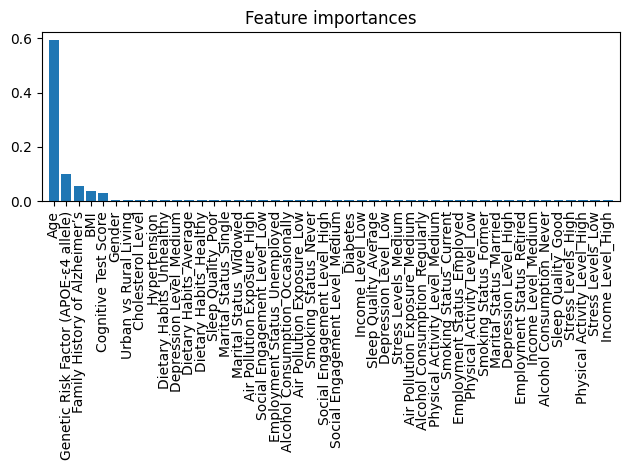

In [620]:
importances = best_rf_model.feature_importances_

import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train is a DataFrame
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {feature_names[indices[f]]} ({importances[indices[f]]:.4f})")

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [621]:
# Select top features
top_features = feature_names[indices[:5]]

# Create new datasets with only top features
X_train_top = X_train[top_features]
X_val_top = X_val[top_features]
X_holdout_top = X_holdout[top_features]

# Train a new model
best_rf_model_top = RandomForestClassifier(
    max_depth=30,
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)
best_rf_model_top.fit(X_train_top, y_train)

# Evaluate the model
y_pred_val_top = best_rf_model_top.predict(X_val_top)
val_accuracy_top = accuracy_score(y_val, y_pred_val_top)
val_confusion_matrix_top = confusion_matrix(y_val, y_pred_val_top)
val_classification_report_top = classification_report(y_val, y_pred_val_top)
print(f"Validation Accuracy with Top Features: {val_accuracy_top:.2f}")
print(f"Validation Confusion Matrix:\n{val_confusion_matrix_top}")
print(f"Validation Classification Report:\n{val_classification_report_top}")


Validation Accuracy with Top Features: 0.71
Validation Confusion Matrix:
[[4674 1414]
 [1584 2728]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      6088
           1       0.66      0.63      0.65      4312

    accuracy                           0.71     10400
   macro avg       0.70      0.70      0.70     10400
weighted avg       0.71      0.71      0.71     10400



In [622]:
#best_rf_model

In [623]:
# Predict on validation data
#y_pred_val = best_rf_model.predict(X_val)

#val_accuracy = accuracy_score(y_val, y_pred_val)
#val_confusion_matrix = confusion_matrix(y_val, y_pred_val)
#val_classification_report = classification_report(y_val, y_pred_val)

#print(f"Validation Accuracy: {val_accuracy:.2f}")
#print(f"Validation Confusion Matrix:\n{val_confusion_matrix}")
#print(f"Validation Classification Report:\n{val_classification_report}")

In [624]:
import joblib

# Save the model to a file
joblib.dump(best_rf_model_top, 'best_rf_model_top.pkl')

['best_rf_model_top.pkl']